Exploratory Data Analysis (EDA) and Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
wine_data = pd.read_csv("winequality-red.csv")

In [6]:
# Display first few rows of the dataset
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
# Check summary statistics
print(wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [8]:
# Check for missing values
print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


C:\Users\Riyaz\AppData\Local\Temp\ipykernel_648\1703251546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, palette='viridis')


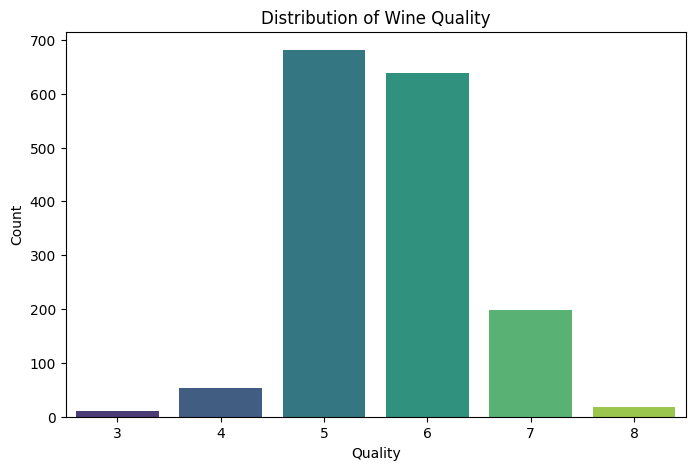

In [9]:
# Visualize the distribution of target variable 'quality'
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

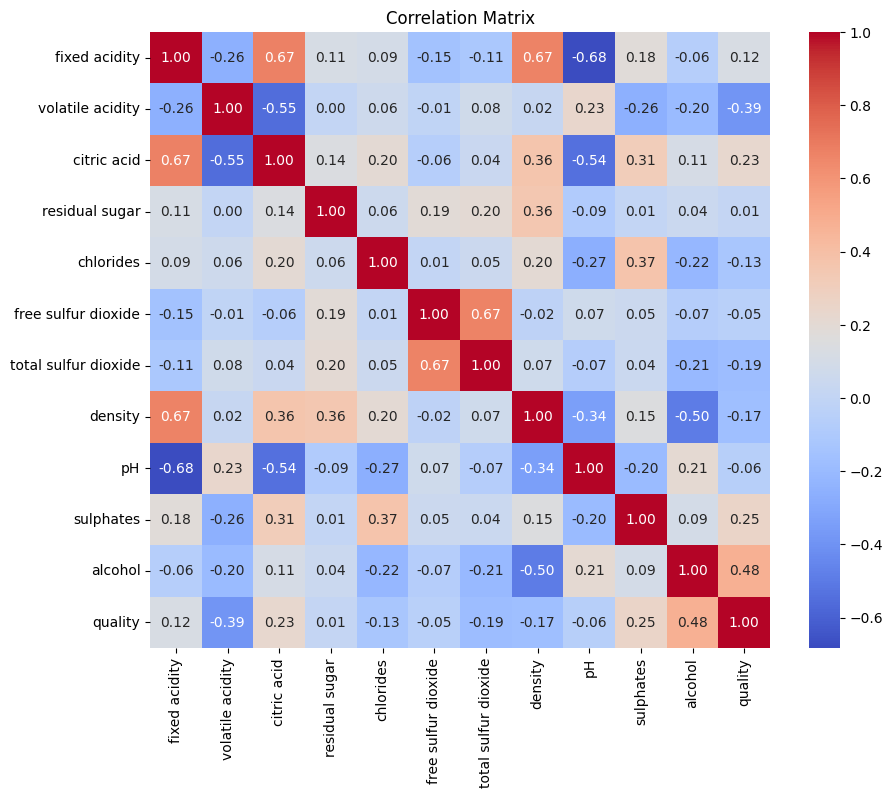

In [10]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Elbow Method for Determining Optimal Number of Clusters (WCSS)

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Select features for clustering
X = wine_data.drop("quality", axis=1)

In [13]:
# Compute Within-Cluster-Sum-of-Squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

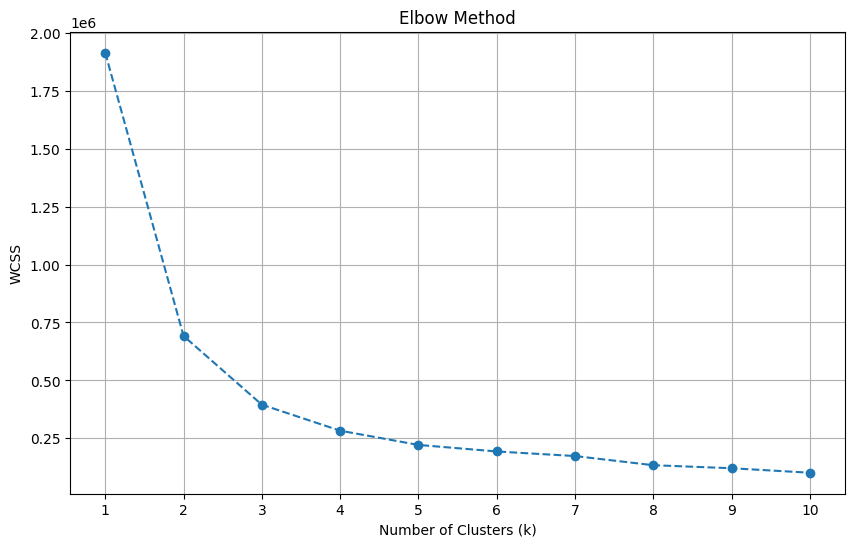

In [14]:
# Plot the WCSS for different values of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [15]:
# Perform k-means clustering with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
wine_data['cluster'] = kmeans.fit_predict(X)

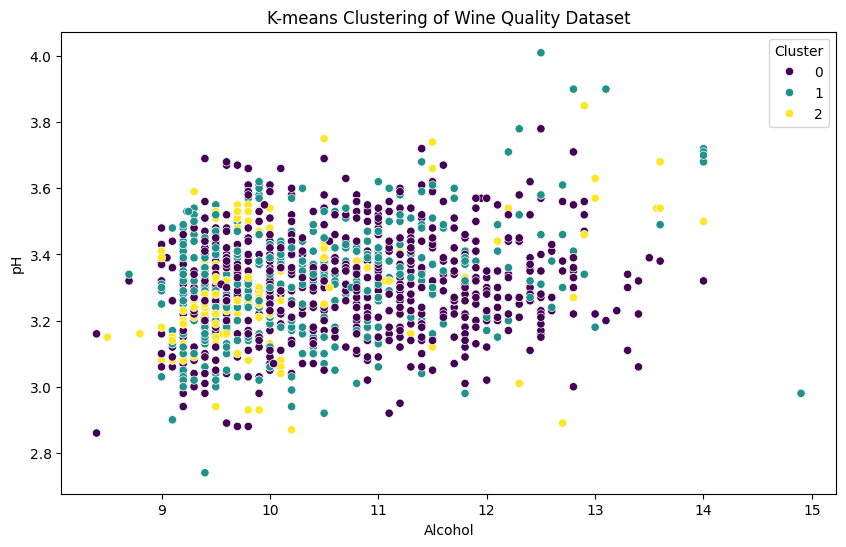

In [16]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wine_data, x='alcohol', y='pH', hue='cluster', palette='viridis')
plt.title('K-means Clustering of Wine Quality Dataset')
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.legend(title='Cluster')
plt.show()

Compute Accuracy and Performance Metrics (Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index)

In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [18]:
# Compute silhouette score
silhouette = silhouette_score(X, wine_data['cluster'])
print("Silhouette Score:", silhouette)

Silhouette Score: 0.5220101372080572


In [19]:
# Compute Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, wine_data['cluster'])
print("Davies-Bouldin Index:", davies_bouldin)

Davies-Bouldin Index: 0.6687274292571835


In [20]:
# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X, wine_data['cluster'])
print("Calinski-Harabasz Index:", calinski_harabasz)

Calinski-Harabasz Index: 3065.263465261216


In [35]:
# Get unique cluster labels
num_clusters = wine_data['cluster'].nunique()

In [37]:
num_clusters

3